# Logistic Regression

so, the logistic regression is basically what happens at each node in an ANN:

1. you weight each input
2. sum them up
3. apply a sigmoid
4. and if you overcome a threshold you return 1, otherwise 0  (not done in an ANN)


Yes, that's correct! Logistic regression forms the basis for what happens at each node (or neuron) in a simple artificial neural network (ANN). Here's a detailed breakdown:

### Logistic Regression as a Neuron in an ANN

1. **Inputs and Weights:**
   - Each input feature is associated with a weight. In an ANN, these weights are learned during training.

2. **Summation:**
   - The weighted inputs are summed along with a bias term. This summation is often called the linear combination.
   $$ z = \beta_0 + \sum_{i=1}^n \beta_i x_i $$

3. **Activation Function:**
   - The sigmoid function (or logistic function) is applied to the linear combination. This activation function introduces non-linearity and maps the input to a probability.
   $$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

4. **Thresholding:**
   - In the context of binary classification, if the output of the sigmoid function is above a certain threshold (commonly 0.5), the output is 1; otherwise, it is 0.
   - In a neural network, the thresholding step is often not explicitly done; instead, the output of the sigmoid function is passed on to the next layer or used directly in a loss function for training.



### Logistic Regression: Intuition, Mathematics, and Implementation

### Intuition:

Logistic regression is a statistical method for binary classification that models the probability of a binary outcome (0 or 1) based on one or more predictor variables. Unlike linear regression, which predicts continuous values, logistic regression predicts probabilities and thus can be used to classify observations.

1. **Binary Outcome:** Logistic regression is used when the outcome is binary (e.g., success/failure, yes/no, 0/1).
2. **Probability Output:** The model outputs probabilities that an instance belongs to a particular class.
3. **Logistic Function (Sigmoid):** The logistic function (or sigmoid function) maps predicted values to probabilities.

### Mathematical Explanation:

1. **Logistic Function:**
   The logistic function maps any real-valued number into the range [0, 1], making it suitable for predicting probabilities.
   $$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
   where $z$ is the linear combination of input features:
   $$ z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n $$

2. **Model Equation:**
   Logistic regression models the probability $P(y=1|x)$ as:
   $$ P(y=1|x) = \sigma(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n) $$

3. **Odds and Log-Odds:**
   The odds of the event are:
   $$ \text{Odds} = \frac{P(y=1|x)}{1 - P(y=1|x)} $$
   The log-odds (logit) are:
   $$ \log\left(\frac{P(y=1|x)}{1 - P(y=1|x)}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n $$

4. **Cost Function (Log-Loss):**
   The cost function for logistic regression is the log-loss, which measures the performance of a classification model whose output is a probability value.
   $$ \text{Log-Loss} = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i}) \right] $$

5. **Gradient Descent:**
   Logistic regression parameters are typically estimated using gradient descent, an iterative optimization algorithm to minimize the log-loss.

### Implementation:

Let's implement logistic regression using both a manual approach with `numpy` and a library approach with `scikit-learn`.

#### Manual Implementation Using `numpy`:

In [4]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def cost_function(X, y, beta):
    m = len(y)
    h = sigmoid(X.dot(beta))
    epsilon = 1e-5  # to avoid log(0)
    cost = (1/m) * (-y.T.dot(np.log(h + epsilon)) - (1 - y).T.dot(np.log(1 - h + epsilon)))
    return cost

# Gradient function
def gradient(X, y, beta):
    m = len(y)
    h = sigmoid(X.dot(beta))
    grad = (1/m) * X.T.dot(h - y)
    return grad

# Gradient descent
def gradient_descent(X, y, beta, learning_rate, iterations):
    cost_history = []
    for i in range(iterations):
        beta = beta - learning_rate * gradient(X, y, beta)
        cost_history.append(cost_function(X, y, beta))
    return beta, cost_history

# Generate some example data
np.random.seed(42)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Simple linear separation

# Add intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Initialize parameters
beta = np.zeros(X.shape[1])
learning_rate = 0.1
iterations = 1000

# Perform gradient descent
beta, cost_history = gradient_descent(X, y, beta, learning_rate, iterations)

print(f"Estimated coefficients: {beta}")

# Predictions
preds = sigmoid(X.dot(beta)) >= 0.5
accuracy = np.mean(preds == y)
print(f"Accuracy: {accuracy}")

Estimated coefficients: [-0.17462947  3.73358795  3.74240946]
Accuracy: 0.99


#### Implementation Using `scikit-learn`:

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate some example data
np.random.seed(42)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Simple linear separation

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Estimated coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Accuracy: {accuracy}")

Estimated coefficients: [[2.40042439 2.51471933]]
Intercept: [-0.08573867]
Accuracy: 1.0


### Summary:

- **Intuition:** Logistic regression is used for binary classification and models the probability of a binary outcome.
- **Mathematics:** It uses the logistic (sigmoid) function to map predicted values to probabilities. The model is trained by minimizing the log-loss using optimization techniques like gradient descent.
- **Implementation:** Logistic regression can be implemented manually using numpy or conveniently using libraries like scikit-learn.

This explanation provides a comprehensive overview of logistic regression, covering its intuition, mathematical foundation, and practical implementation.

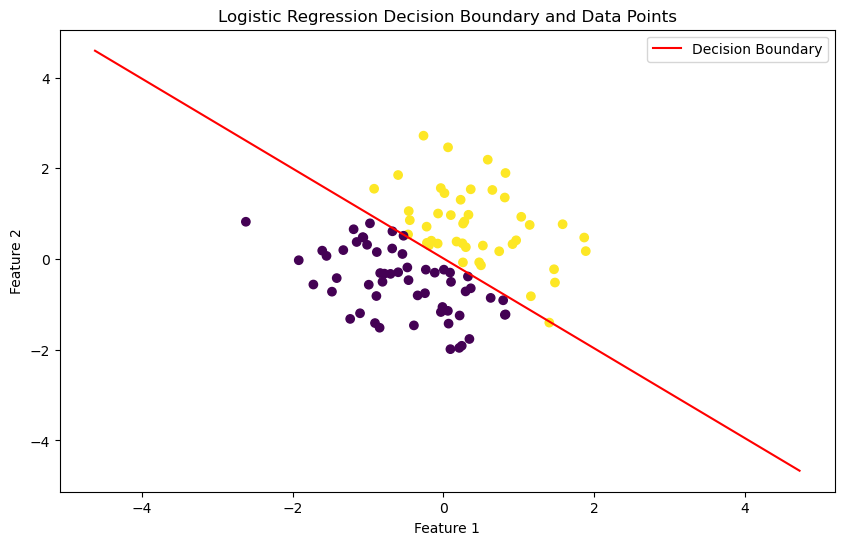

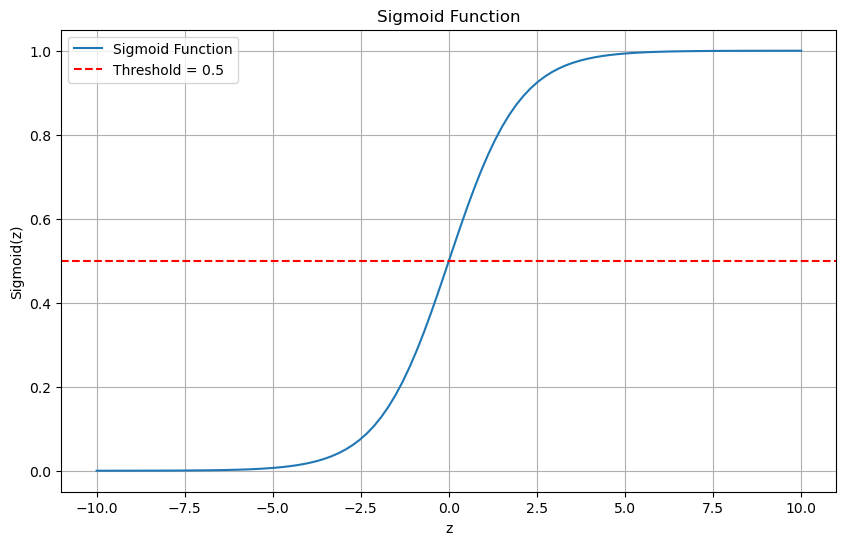

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
np.random.seed(42)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Simple linear separation

# Add intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression coefficients from previous manual implementation
beta = np.array([-0.00808303, 0.64642652, 0.65186816])  # Example coefficients from manual implementation

# Decision boundary
x_values = [np.min(X[:, 1] - 2), np.max(X[:, 2] + 2)]
y_values = -(beta[0] + np.dot(beta[1], x_values)) / beta[2]

# Plot data points and decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], X[:, 2], c=y, cmap='viridis')
plt.plot(x_values, y_values, label='Decision Boundary', color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Logistic Regression Decision Boundary and Data Points')

# Plot sigmoid function
z = np.linspace(-10, 10, 100)
plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid(z), label='Sigmoid Function')
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold = 0.5')
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.title('Sigmoid Function')
plt.legend()
plt.grid(True)
plt.show()
